In [59]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

# Project 3 _ House Price Prediction ( Bostan House Dataset)
### YT - Siddhardhan

##### Solar Data ---> Data Pre-Processing ---> Data Analysis ---> Train Test Split ---> XGBoost Regressor ---> Evaluation

In [60]:
C:\Users\Home\Desktop\ML Projects\YT - Siddharth

SyntaxError: unexpected character after line continuation character (<ipython-input-60-7794992a0816>, line 1)

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
import xgboost
from sklearn import metrics

In [62]:
# Import the Boston House Price Dataset
housing_data = sklearn.datasets.load_boston()
# Loading the Dataset to a Pandas Dataframe
housing_dataframe = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
housing_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [63]:
# Adding Target Column (Price) as Dataframe
housing_dataframe['Price'] = housing_data.target
housing_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [64]:
# Statistical Measures
housing_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

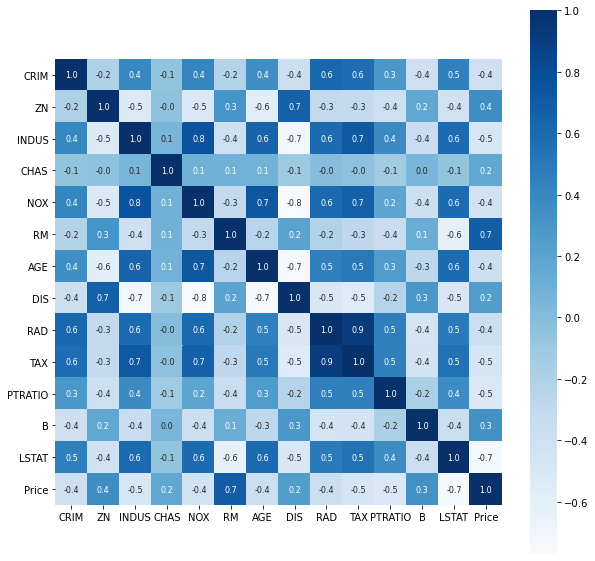

In [65]:
# Correlation between various features
correlation = housing_dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [66]:
# Splitting the Data and Target
X = housing_dataframe.drop(columns=['Price'],axis=1)
y = housing_dataframe['Price']

In [104]:
# Training and Testing Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [105]:
# Loading the Model with X_train
model = xgboost.XGBRegressor()

In [106]:
# Training the model with X_train
model.fit(X_train,y_train)
train_predict = model.predict(X_train)

In [107]:
# R square Error
score_1 = metrics.r2_score(y_train,train_predict)
print("R square Error",score_1)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train,train_predict)
print('Mean Absolute Error',score_2)

R square Error 0.9999978793153168
Mean Absolute Error 0.009829667732540447


In [108]:
# Training the model with X_test
model.fit(X_test,y_test)
test_predict = model.predict(X_test)

In [109]:
# R square Error
score_1 = metrics.r2_score(y_test,test_predict)
print("R square Error",score_1)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test,test_predict)
print('Mean Absolute Error',score_2)

R square Error 0.9999999849280078
Mean Absolute Error 0.0006986549026087571


Text(0, 0.5, 'Predicted Price')

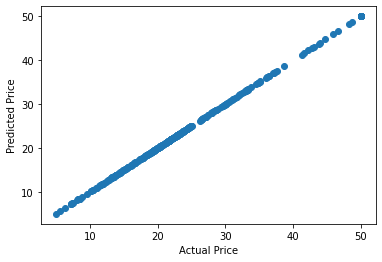

In [112]:
# Visualizing the Actual Prices and Predicted Prices
plt.scatter(y_train,train_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# All the values are close to each other and there ratio is very small, it means the prediction is very accurate